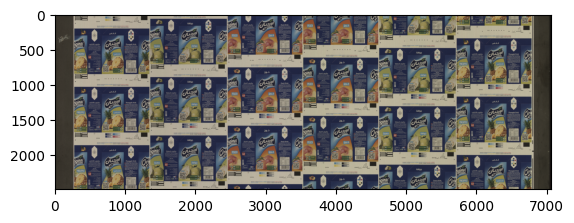

In [17]:
import os
from skimage import io
from matplotlib import pyplot as plt
path = '/Users/USER/Desktop/HACKATHON/data/Job1.bmp'
im = io.imread(os.path.join(path))

plt.imshow(im)

In [14]:
import fitz  # PyMuPDF
import os

import fitz
import os
 
def pdf_to_jpg(pdf_path, output_folder, zoom_x=2.0, zoom_y=2.0):
    pdf_document = fitz.open(pdf_path)
 
    # Create a zoom matrix to increase resolution
    mat = fitz.Matrix(zoom_x, zoom_y)
 
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        image = page.get_pixmap(matrix=mat)  # apply the zoom matrix
 
        jpg_filename = os.path.join(output_folder, f'page_{page_number + 1}.jpg')
        image.save(jpg_filename)
 
    pdf_document.close()

# Usage example
pdf_path = '/Users/USER/Desktop/HACKATHON/samples/SA-A067.pdf'  # Replace 'input.pdf' with the path to your PDF file
output_folder = '/Users/USER/Desktop/HACKATHON/samples_images'  # Output folder where JPG images will be saved
os.makedirs(output_folder, exist_ok=True)

pdf_to_jpg(pdf_path, output_folder)


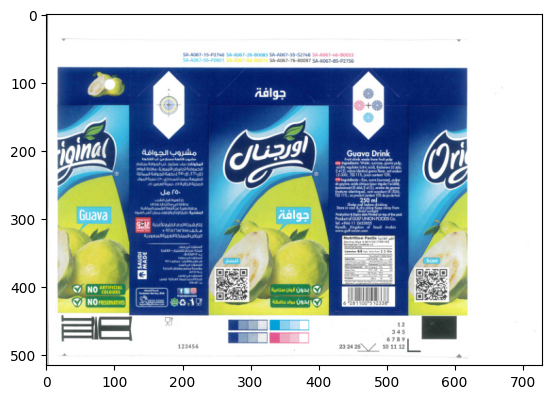

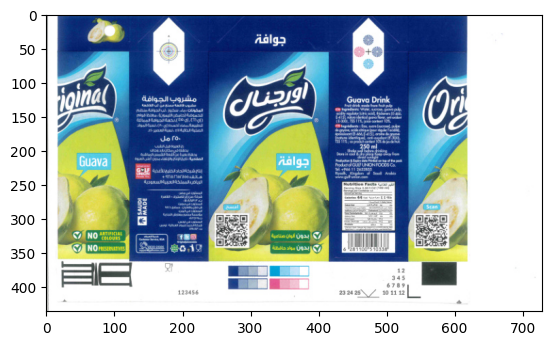

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# Load the image
image = cv2.imread('/Users/omarelherraoui/Documents/pioneers4.0/PioneersHackathon4.0/samples_images/page_1.jpg')

from pdf2image import convert_from_path
import cv2
import pytesseract

# If the image is read correctly, it shouldn't be None
if image is not None:
    # Convert from BGR to RGB if you need to display with libraries like matplotlib
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else:
    print("Error reading the image.")

# Convert to appropriate format for processing
img_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Rotate the image to make it vertical
rotated_img = cv2.rotate(img_array, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Extract the top portion for ID detection
top_portion = rotated_img[:80]

# Use OCR to extract the ID
extracted_id = pytesseract.image_to_string(top_portion, config='--psm 6').strip()

plt.imshow(rotated_img)
plt.show()

# # Convert the image to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Otsu's thresholding to convert the grayscale image to binary
# thresh_value = threshold_otsu(gray_image)
# binary_image = gray_image > thresh_value

# # Find contours in the binary image
# contours, _ = cv2.findContours(binary_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Define regions to be removed based on contour area or other criteria
# # For example, if you know the approximate dimensions of the regions to be removed
# # you can filter contours based on their area.
# # This step requires domain-specific knowledge about the size and position of the regions to be removed.
# # Example: Remove contours with area less than a threshold
# min_contour_area = 1000
# filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# # Create a mask for the regions to be removed
# mask = np.zeros_like(binary_image)
# cv2.drawContours(mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

# # Invert the mask (regions to be removed are white, others are black)
# mask_inv = cv2.bitwise_not(mask)

# # Apply the mask to the original image to remove the specified regions
# result_image = cv2.bitwise_and(image, image, mask=mask_inv)
